In [18]:
# Import packages and data files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

In [14]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.364130,-71.029910,Entire home/apt,125,32,20,2021-04-30,0.29,1,112
1,5506,**Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.328440,-71.095810,Entire home/apt,145,3,107,2020-05-01,0.90,9,46
2,6695,Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.328020,-71.093870,Entire home/apt,169,3,115,2019-11-02,1.37,9,109
3,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.359060,-71.062710,Entire home/apt,76,91,32,2020-04-16,0.41,5,262
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.350610,-71.087870,Entire home/apt,106,29,5,2020-12-02,0.18,11,331
5,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,North End,42.363770,-71.052060,Entire home/apt,100,29,2,2016-05-23,0.03,11,314
6,13247,Back Bay studio apartment,51637,Susan,NaN,Back Bay,42.351640,-71.087520,Entire home/apt,75,91,0,NaN,NaN,2,0
7,16384,Small Room in Cambridge Kendall MIT,23078,Eric,NaN,Beacon Hill,42.359560,-71.069800,Private room,50,91,0,NaN,NaN,1,365
8,18711,The Dorset Redline | 3BR 1BA | Short walk to R...,71783,Lance,NaN,Dorchester,42.322120,-71.060960,Entire home/apt,111,30,52,2019-10-05,1.00,27,221
9,22354,COPLEY SQ...19TH C.TWNHSE SUNNY RM,85770,Robert,NaN,South End,42.344870,-71.074410,Private room,148,29,316,2019-11-04,3.13,4,90


In [15]:
def clean_listings(df):
    
    # we are going to remove all unnecessary info for our studies
    df.drop(['name','host_id', 'host_name', 'neighbourhood_group', 'minimum_nights','number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count','availability_365'], axis=1, inplace=True)
    
     # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Drop rows with missing salary values
    df = df.dropna(subset=['neighbourhood'], axis=0)
    
    #Create new df
    x = df['price']
    return df, x

In [16]:
listings_clean, P = clean_listings(listings.copy())

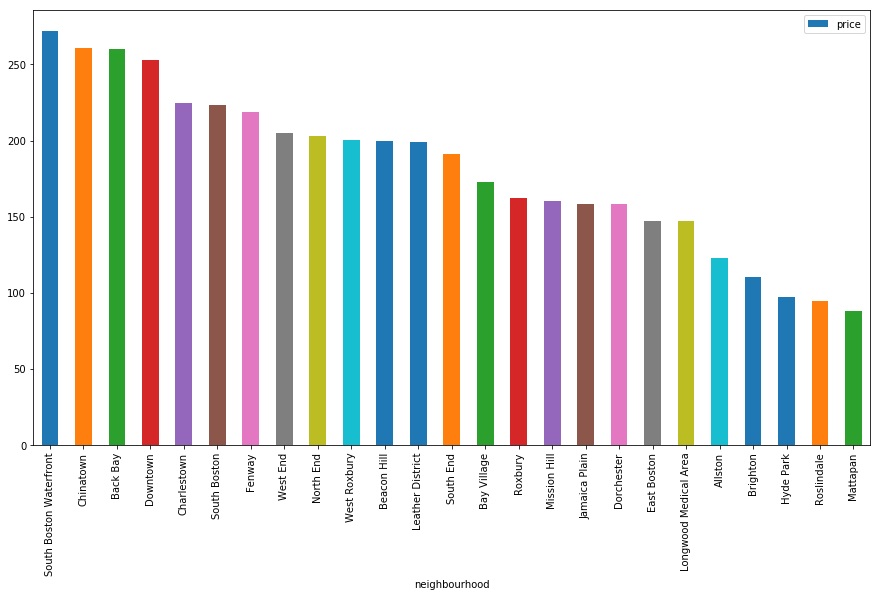

In [17]:
#Plot in order to find most expensive to cheapest neighbourhood
neighbourhood_price = listings_clean.groupby('neighbourhood')[['price']].mean()
neighbourhood_price = neighbourhood_price.reset_index()
neighbourhood_price = neighbourhood_price.sort_values(by='price',ascending=False)
ax = neighbourhood_price.plot.bar(x='neighbourhood', y='price', figsize = (15,8))

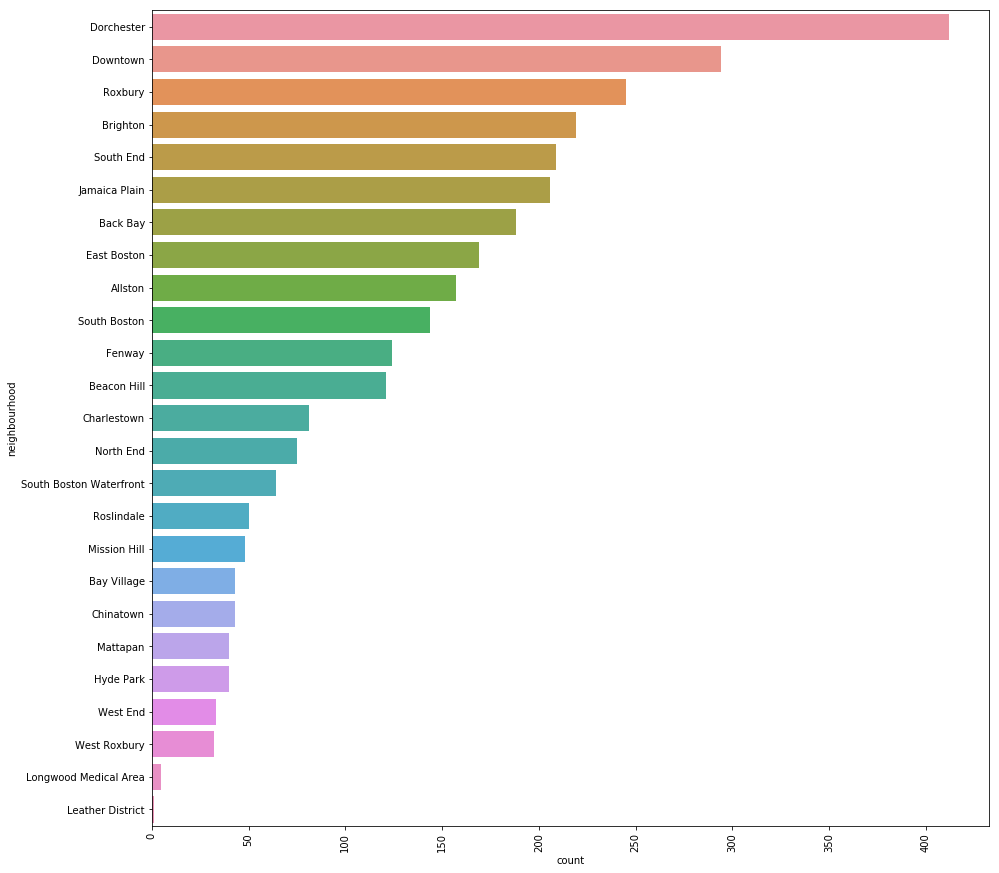

In [19]:
# Bar chart with the count of each neighborhood in the listings data
plt.figure(figsize=[15,15])
sns.countplot(data=listings, y='neighbourhood', order=listings['neighbourhood'].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
calendar.info()

In [ ]:
def clean_calendar(df):
    
    # Convert price from string data type to float
    df['price'] = df['price'].str.replace('$', '')
    df['price'] = df['price'].str.replace(',', '').astype(float)
    
    # Convert date from object to datetime
    df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

    # Drop rows with missing salary values
    df = df.dropna(subset=['price','date'], axis=0)    
    
    #Drop date outliers
    #df.drop(df[df.date > '2021-06-01'].index, inplace=True)

    return df

In [ ]:
calendar_clean = clean_calendar(calendar.copy())

In [ ]:
#Plot price vs date
time = calendar_clean.groupby(['date'])['price'].mean()
time = time.to_frame().reset_index()
time = time.sort_values(by='date',ascending=True)
plt.figure(figsize=(15,8))
plt.plot(time['date'],time['price'])